Nama : Nani Fitria Ramadhani

NIM : 23031554013

Kelas : 2023 D

---Visualisasi Data Mining---

In [1]:
pip install matplotlib

In [2]:
pip install seaborn

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Visualisasi Handling Missing Value

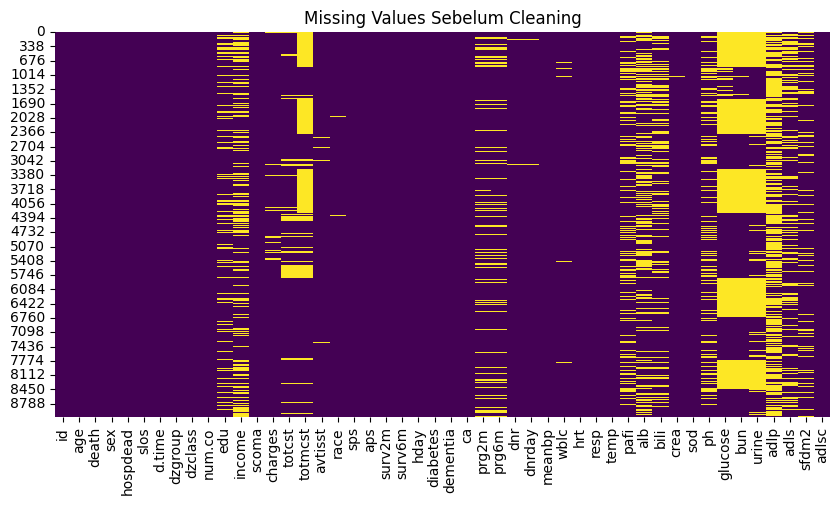

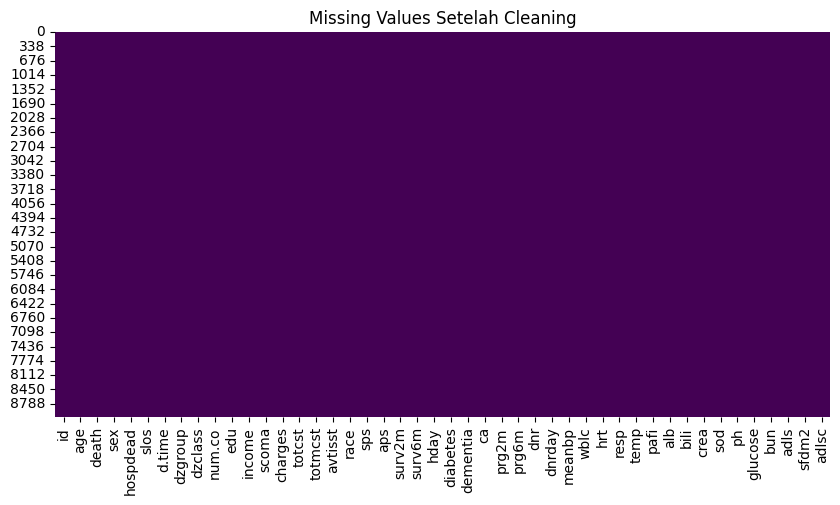

In [3]:
df = pd.read_csv("data_preprocessing.csv")

# Visualisasi data awal
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Sebelum Cleaning")
plt.show()

df = pd.read_csv("data_cleaning.csv")

# Visualisasi setelah melakukan missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Setelah Cleaning")
plt.show()

Kedua gambar tersebut menunjukkan visualisasi missing values dalam dataset sebelum dan setelah proses data cleaning.
**Missing Values Sebelum Cleaning**  
   - Grafik tersebut menunjukkan distribusi missing values dalam dataset sebelum dilakukan pembersihan.  
   - Warna kuning menunjukkan adanya nilai yang hilang dalam dataset, sedangkan warna ungu menandakan nilai yang tersedia.  
   - Terlihat banyak kolom yang memiliki missing values, terutama pada kolom seperti income, charges, totrcost, ca, sod, glucose, bun, dan lainnya.

**Missing Values Setelah Cleaning**  
   - Setelah dilakukan data cleaning, tidak ada lagi missing values yang tersisa sehingga seluruh gambar berwarna ungu.  
   - Semua nilai yang hilang telah diatasi.
Proses data cleaning yang dilakukan berhasil menghilangkan seluruh missing values, sehingga dataset sudah siap untuk digunakan dalam analisis atau pemodelan lebih lanjut.

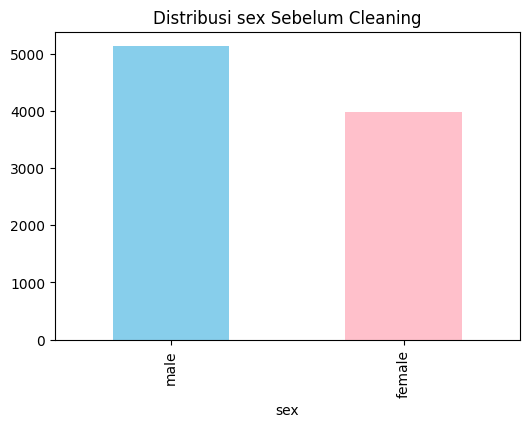

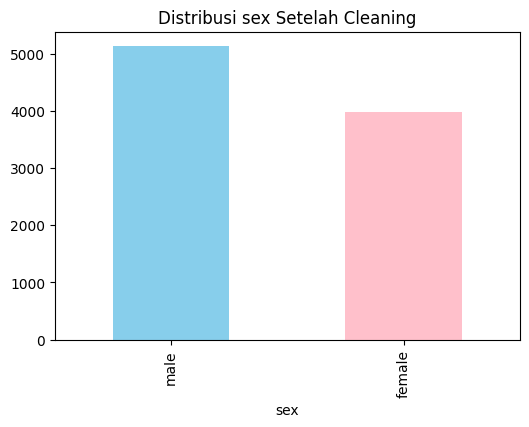

In [4]:
# melihat distribusi pada fitur sex
df = pd.read_csv("data_preprocessing.csv")

# Sebelum: Distribusi kategori pada sex
plt.figure(figsize=(6, 4))
df["sex"].value_counts().plot(kind="bar", color=["skyblue", "pink"])
plt.title("Distribusi sex Sebelum Cleaning")
plt.show()

df = pd.read_csv("data_cleaning.csv")

# Setelah: Distribusi kategori pada sex
plt.figure(figsize=(6, 4))
df["sex"].value_counts().plot(kind="bar", color=["skyblue", "pink"])
plt.title("Distribusi sex Setelah Cleaning")
plt.show()

Visualisasi tersebut digunakan untuk melihat perbedaan sebelum dan setelah dilakukan data cleaning terhadap salah satu fitur(sex).

Feature Selection

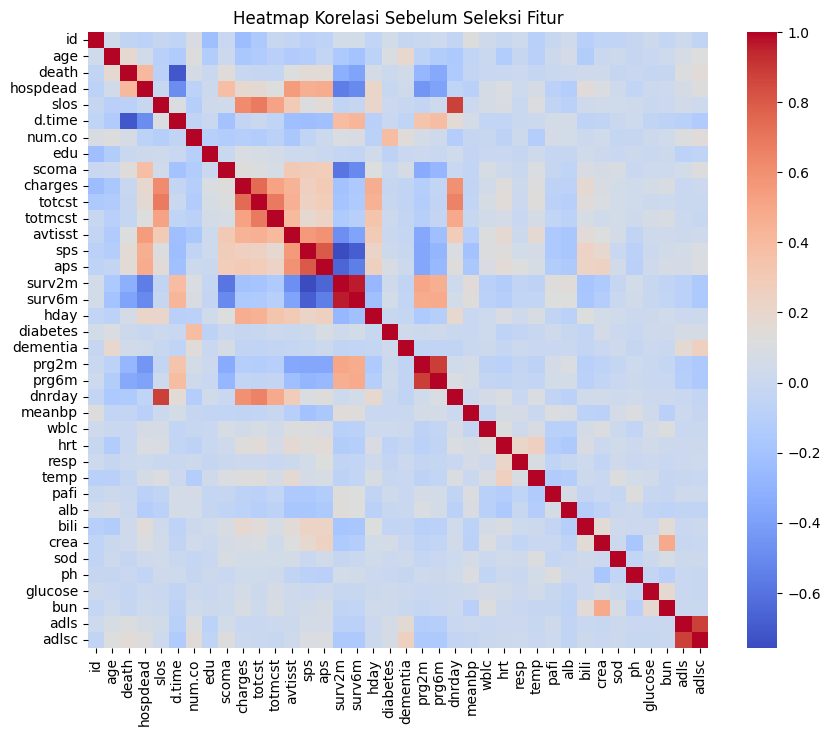

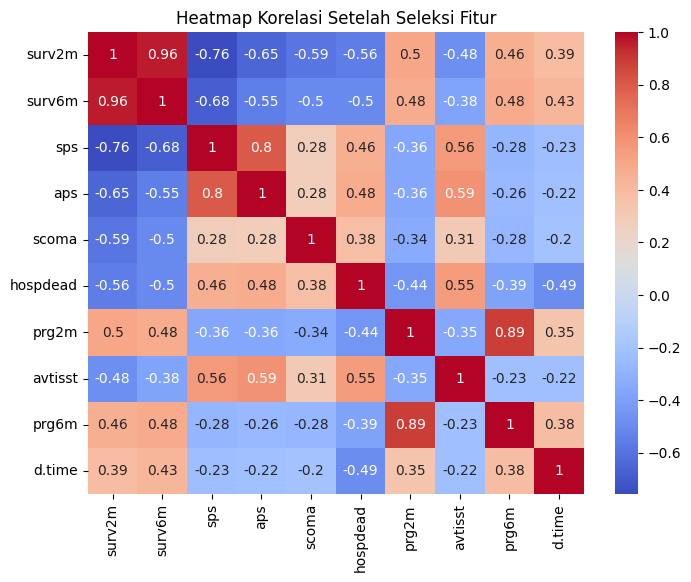

In [5]:
# Heatmap sebelum korelasi semua fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Heatmap Korelasi Sebelum Seleksi Fitur")
plt.show()

# Seleksi fitur berdasarkan korelasi
df_numeric = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numeric.corr(numeric_only=True)
correlation_target = correlation_matrix["surv2m"].abs().sort_values(ascending=False)
selected_features = correlation_target.index[:10].tolist()
df_reduced = df[selected_features]

# Simpan dataset setelah seleksi fitur
df_reduced.to_csv("korelasi.csv", index=False)

# Korelasi setelah fitur yang dipilih
plt.figure(figsize=(8, 6))
sns.heatmap(df_reduced.corr(), cmap="coolwarm", annot=True)
plt.title("Heatmap Korelasi Setelah Seleksi Fitur")
plt.show()

**Heatmap Korelasi Sebelum Seleksi Fitur**
- Warna merah tua menunjukkan korelasi positif yang kuat (mendekati 1), sedangkan warna biru tua menunjukkan korelasi negatif yang kuat (mendekati -1).
- Banyak fitur yang memiliki korelasi rendah (warna cenderung biru muda atau abu-abu), berarti banyak fitur yang mungkin tidak terlalu berkontribusi terhadap model.
- Ada beberapa fitur dengan korelasi sangat tinggi terhadap fitur lain (garis diagonal merah), yang bisa menandakan adanya redundansi fitur.
**Heatmap Korelasi Setelah Seleksi Fitur**
- Setelah seleksi fitur, hanya fitur yang dianggap paling penting yang dipertahankan.
- Korelasi antar fitur terlihat cukup kuat.
- Beberapa fitur seperti surv2m, surv6m, sps, aps, scoma, hospdead, prg2m, prg6m, d.time, dan avitss dipilih sebagai fitur utama.
- Beberapa fitur memiliki korelasi tinggi satu sama lain, misalnya surv2m dan surv6m (0.96, dan prg2m dan prg6m (0.89), yang menunjukkan hubungan erat.

Visualisasi Normalization

<ipython-input-6-249789a09899>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_reduced[selected_features[0]], label="Sebelum", shade=True)
<ipython-input-6-249789a09899>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_normalized[selected_features[0]], label="Sesudah", shade=True)


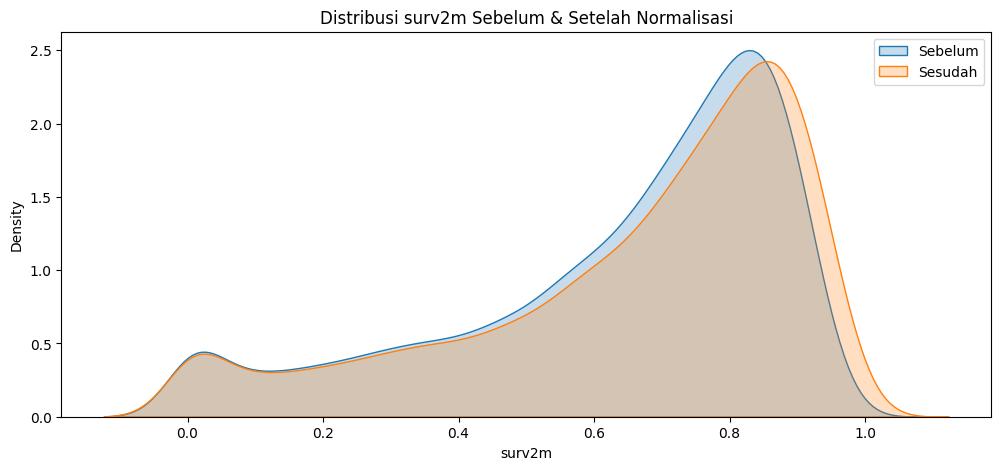

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi fitur numerik
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_reduced), columns=df_reduced.columns)

# Simpan dataset hasil normalisasi
df_normalized.to_csv("normalisasi.csv", index=False)

# Visualisasi perbedaan distribusi sebelum dan sesudah normalisasi
plt.figure(figsize=(12, 5))
sns.kdeplot(df_reduced[selected_features[0]], label="Sebelum", shade=True)
sns.kdeplot(df_normalized[selected_features[0]], label="Sesudah", shade=True)
plt.title(f"Distribusi {selected_features[0]} Sebelum & Setelah Normalisasi")
plt.legend()
plt.show()

**Sebelum Normalisasi /Warna Biru**
   - Distribusi memiliki puncak utama di sekitar 0.8.
   - Kurva cenderung lebih tinggi dibandingkan dengan setelah normalisasi.
   - Sebaran data masih dalam skala aslinya.

**Setelah Normalisasi /Warna Oranye**
   - Puncak distribusi bergeser dan menjadi lebih lebar, yang berarti bahwa nilai-nilai dalam variabel ini telah disesuaikan dalam rentang tertentu (0 hingga 1 dalam normalisasi Min-Max).

Sehingga Normalisasi tidak mengubah bentuk distribusi secara signifikan, tetapi menyesuaikan skala data agar lebih seragam.

Data Exploration

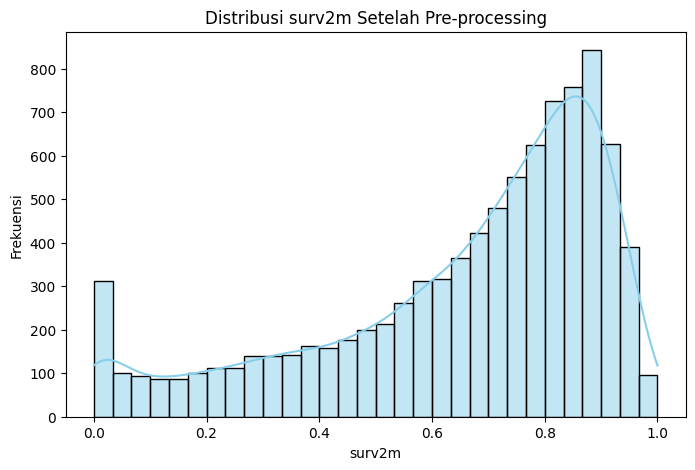

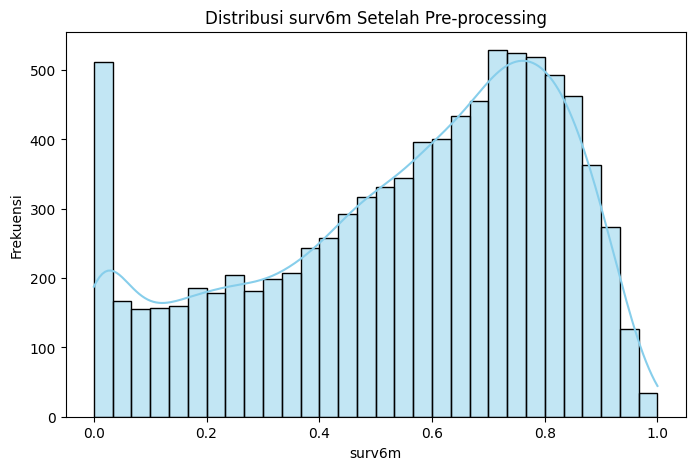

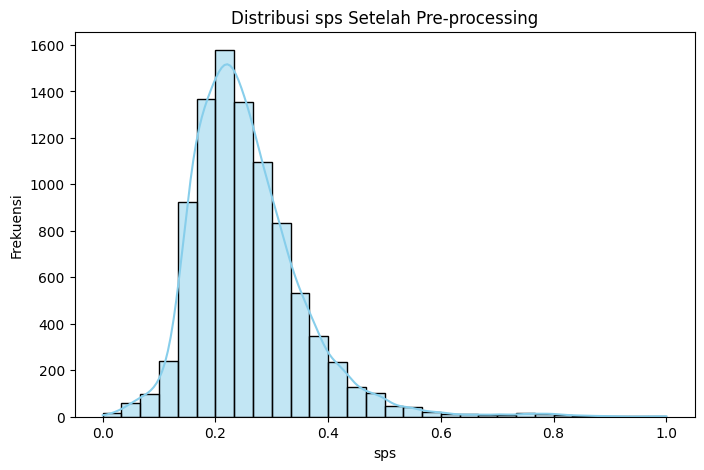

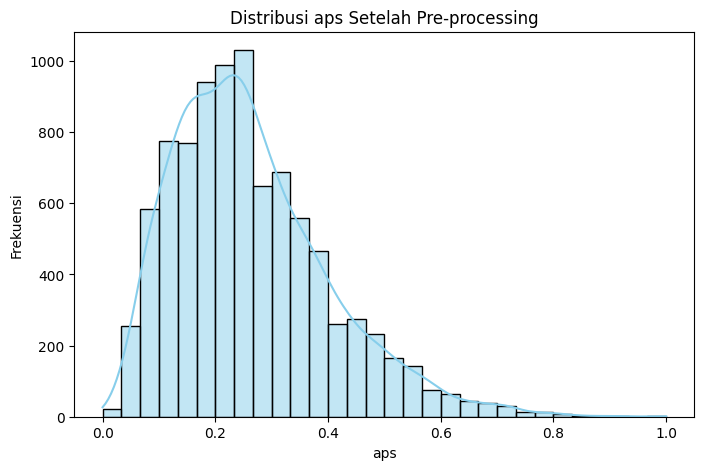

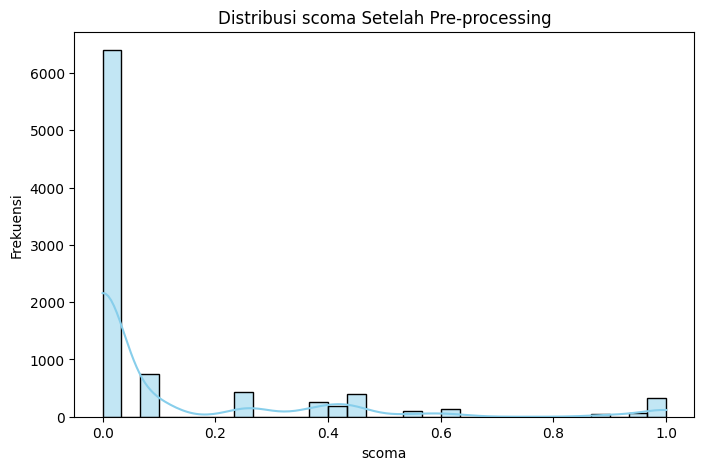

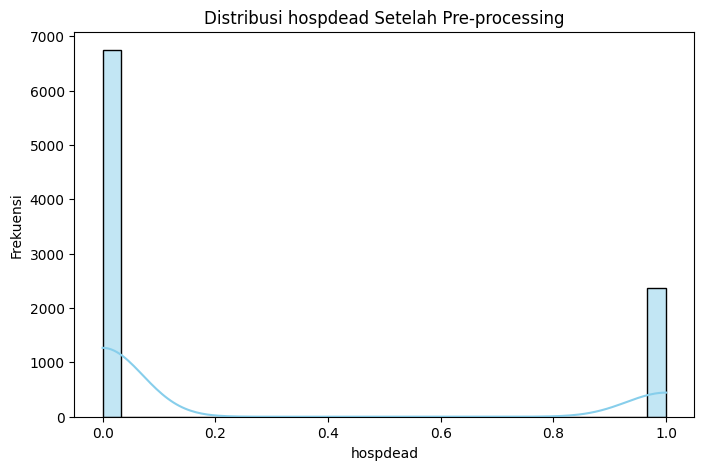

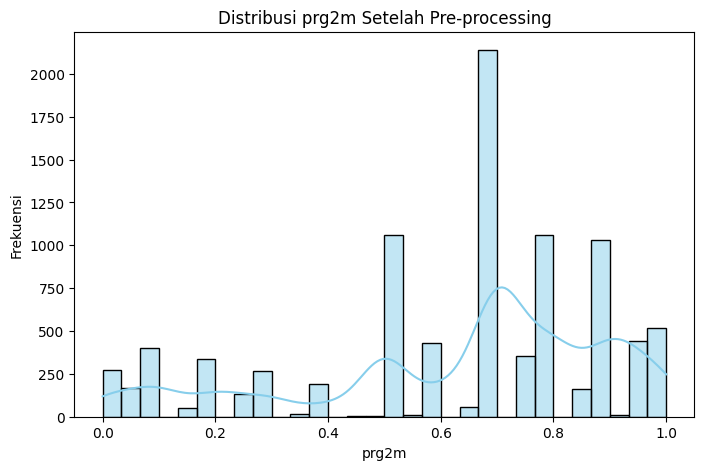

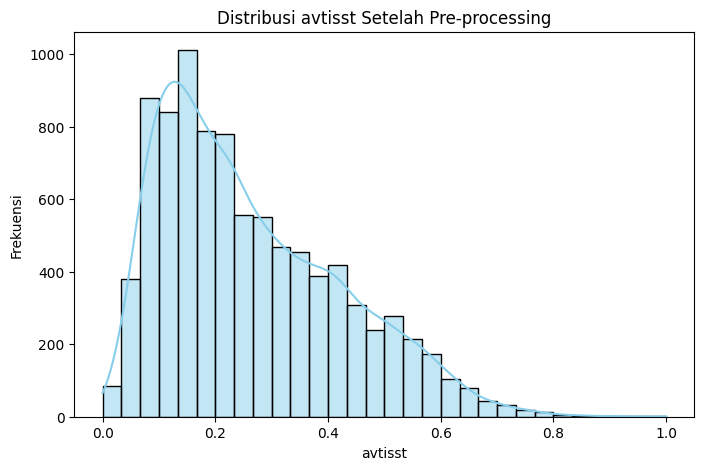

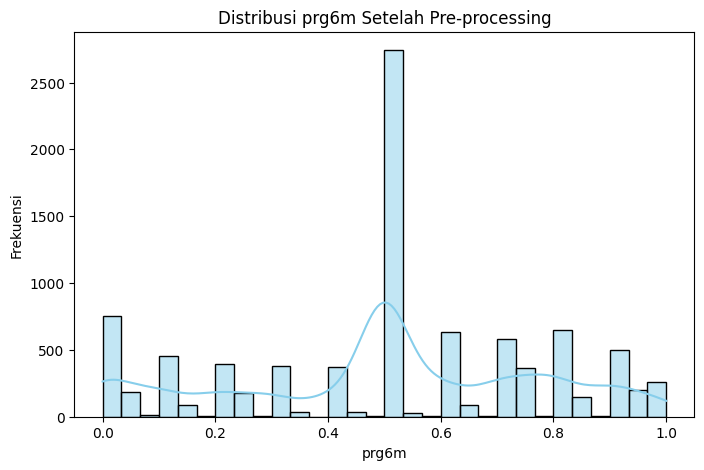

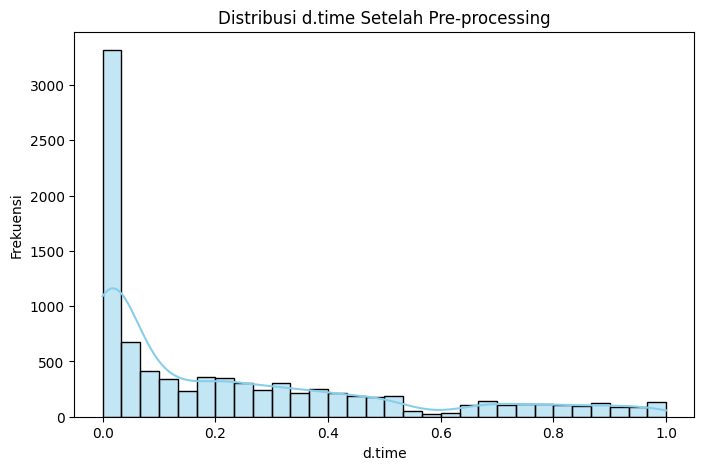

In [7]:
# Untuk fitur numerik

df_final = pd.read_csv("normalisasi.csv")

# Histogram untuk setiap fitur numerik
for col in df_final.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_final[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribusi {col} Setelah Pre-processing")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

Interpretasi untuk visualisasi distribusi variabel surv2m setelah melakukan preprocessing
   - Data tidak terdistribusi secara normal, tetapi memiliki skewness ke arah kanan (lebih banyak data berada di bagian nilai tinggi sekitar 0.6 - 1.0).
   - Ada lonjakan frekuensi yang signifikan di sekitar 0.0 yang bisa menunjukkan adanya banyak nilai nol dalam dataset.
   - Histogram menunjukkan tren peningkatan frekuensi seiring naiknya nilai surv2m dengan puncaknya di sekitar 0.8 - 0.9.
   - Setelah mencapai puncak frekuensi mulai menurun hingga 1.0.
   - Garis KDE menunjukkan distribusi yang cukup halus, dengan sedikit variasi di rentang 0.2 - 0.4.

<ipython-input-8-21414ff24dad>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x=col, palette="pastel")


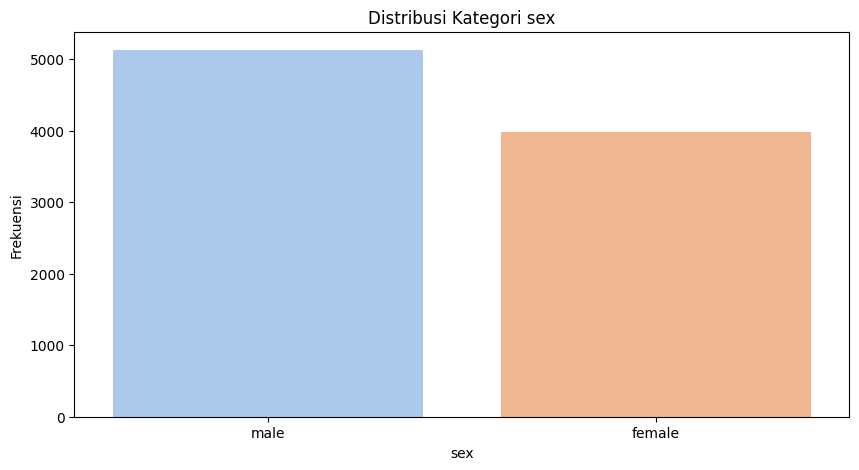

<ipython-input-8-21414ff24dad>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x=col, palette="pastel")


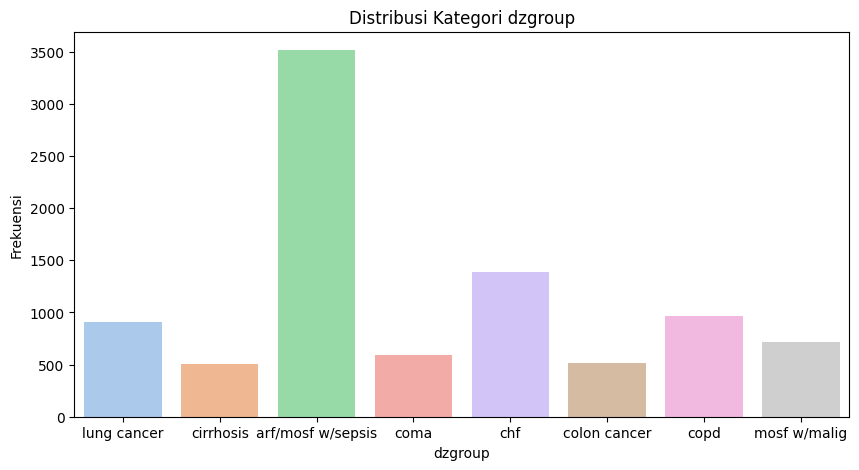

<ipython-input-8-21414ff24dad>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x=col, palette="pastel")


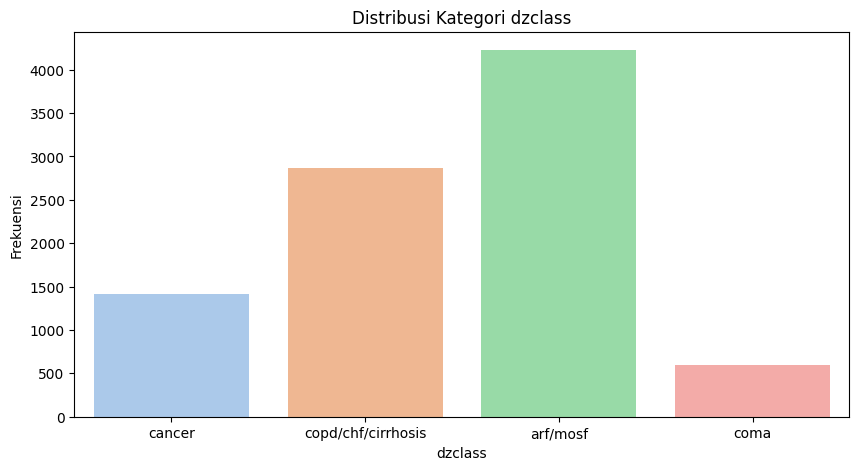

<ipython-input-8-21414ff24dad>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x=col, palette="pastel")


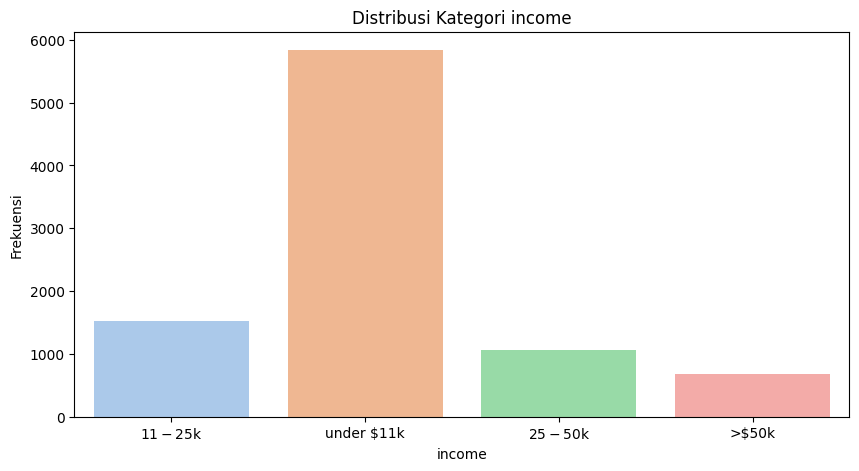

<ipython-input-8-21414ff24dad>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x=col, palette="pastel")


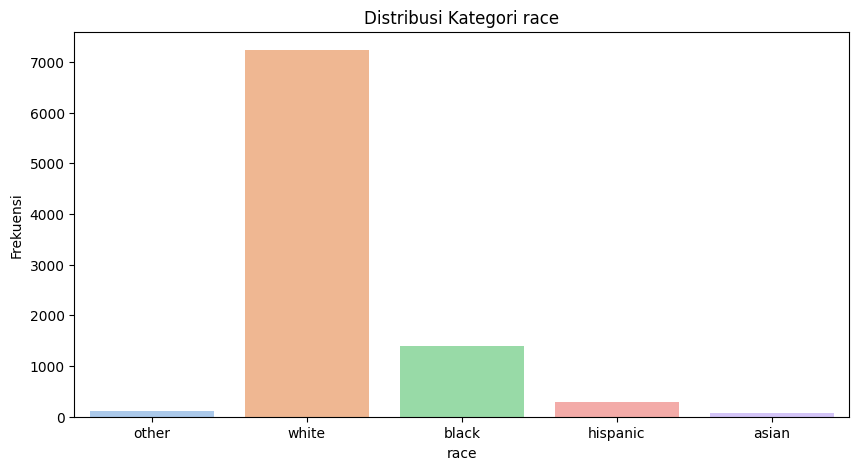

<ipython-input-8-21414ff24dad>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x=col, palette="pastel")


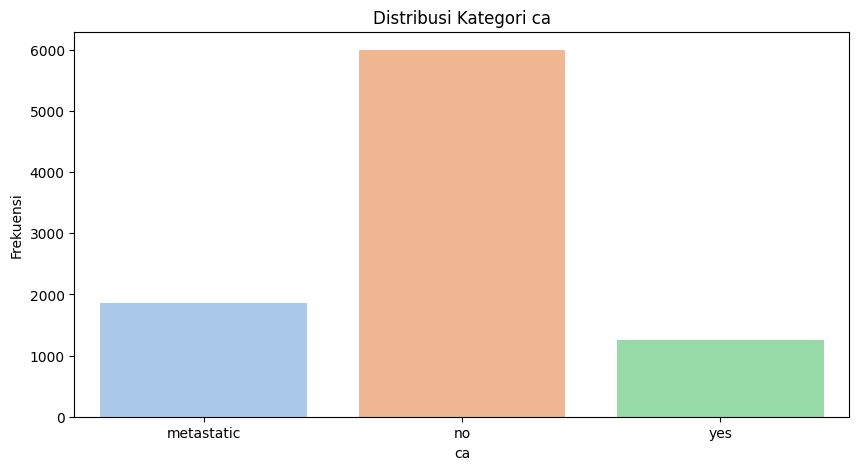

<ipython-input-8-21414ff24dad>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x=col, palette="pastel")


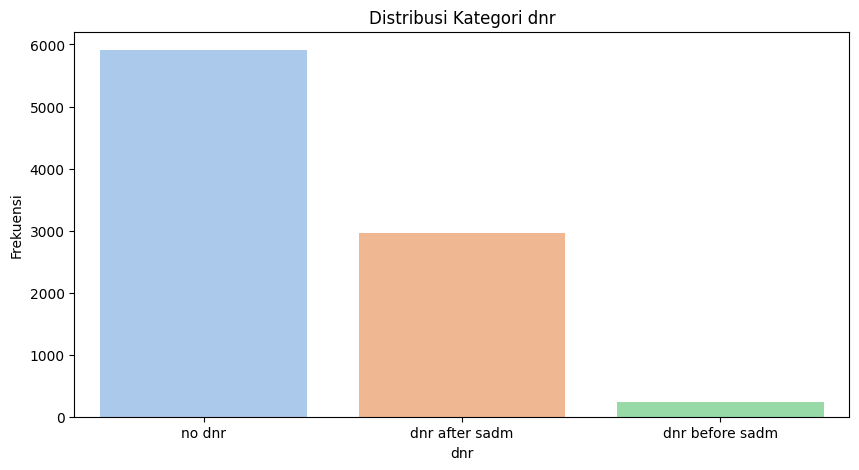

<ipython-input-8-21414ff24dad>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x=col, palette="pastel")


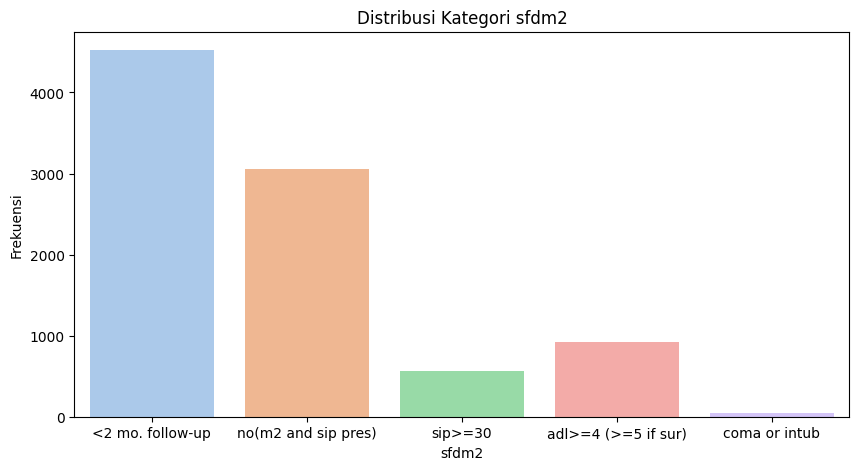

In [8]:
# Untuk fitur numerik

df_final = pd.read_csv("data_cleaning.csv")

# Menampilkan count plot untuk setiap fitur kategorikal
for col in df_final.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_final, x=col, palette="pastel")
    plt.title(f"Distribusi Kategori {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

Interpretasi untuk visualisasi distribusi variabel sex setelah melakukan preprocessing
   - Laki-laki (male) memiliki frekuensi yang lebih tinggi sekitar 5.000+ data.
   - Perempuan (female) memiliki frekuensi yang lebih rendah, sekitar 4.000 data.
   - Perbedaan frekuensi tidak terlalu besar.
   - Variabel sex masih relatif seimbang meskipun ada dominasi sedikit dari kategori laki-laki.

In [11]:
# csv untuk menyimpan semua hasil visualisasi

df_final = pd.read_csv("normalisasi.csv")
import os
output_folder = "hasil visualisasi"
os.makedirs(output_folder, exist_ok=True)

# Histogram untuk setiap fitur numerik
for col in df_final.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_final[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribusi '{col}' Setelah Pre-processing")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.savefig(f"{output_folder}/{col}_histogram.png")
    plt.close()

print(f"Semua visualisasi telah disimpan di folder {output_folder}")


Semua visualisasi telah disimpan di folder hasil visualisasi
